In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
환자 = pd.read_csv('/project/data/폐렴환자.csv')
환자

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
1,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
2,251,268,F,2132-02-21 00:00:00,2198-02-18 00:00:00,2198-02-18 00:00:00,NaN,1
3,252,269,M,2130-09-30 00:00:00,NaN,NaN,NaN,0
4,628,665,M,2052-05-20 00:00:00,2120-02-04 00:00:00,2120-02-04 00:00:00,NaN,1
...,...,...,...,...,...,...,...,...
7802,31801,43932,M,2080-06-26 00:00:00,2153-03-01 00:00:00,NaN,2153-03-01 00:00:00,1
7803,31802,43937,M,2113-03-30 00:00:00,2200-08-05 00:00:00,2200-08-05 00:00:00,2200-08-05 00:00:00,1
7804,31807,43959,F,2028-05-13 00:00:00,NaN,NaN,NaN,0
7805,31813,43982,F,2065-04-17 00:00:00,NaN,NaN,NaN,0


In [3]:
환자lab = pd.read_csv('/project/data/폐렴환자lab.csv')
환자lab

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,FLAG
0,5144,9,150750.0,50819,2149-11-14 06:07:00,NaN
1,5145,9,150750.0,50820,2149-11-14 06:07:00,NaN
2,5146,9,150750.0,50821,2149-11-14 06:07:00,abnormal
3,5147,9,150750.0,50826,2149-11-14 06:07:00,NaN
4,5148,9,150750.0,50827,2149-11-14 06:07:00,NaN
...,...,...,...,...,...,...
9356344,27427231,96442,120151.0,51248,2115-06-29 04:45:00,NaN
9356345,27427232,96442,120151.0,51249,2115-06-29 04:45:00,NaN
9356346,27427233,96442,120151.0,51250,2115-06-29 04:45:00,NaN
9356347,27427234,96442,120151.0,51254,2115-06-29 04:45:00,abnormal


# 중복 제거 

In [4]:
환자lab = 환자lab.drop(['ROW_ID','HADM_ID'],axis=1)
환자lab[환자lab.duplicated()]

,SUBJECT_ID,ITEMID,CHARTTIME,FLAG
5560,68,51476,2173-08-10 01:17:00,NaN
5566,68,51491,2173-08-10 01:17:00,NaN
5568,68,51492,2173-08-10 01:17:00,NaN
5571,68,51498,2173-08-10 01:17:00,NaN
5574,68,51508,2173-08-10 01:17:00,NaN
...,...,...,...,...
9110916,92644,51362,2114-04-27 12:04:00,abnormal
9110918,92644,51363,2114-04-27 12:04:00,NaN
9243999,98358,51266,2177-04-17 02:43:00,NaN
9276864,98358,51266,2177-03-31 04:10:00,NaN


In [5]:
print("제거할 데이터 개수:", 환자lab.duplicated().sum())
print("중복 제거 전 shape:", 환자lab.shape)

환자lab.drop_duplicates(inplace=True)
print("모두 중복되는 샘플 제거 후 shape:", 환자lab.shape)

제거할 데이터 개수: 6322
중복 제거 전 shape: (9356349, 4)
모두 중복되는 샘플 제거 후 shape: (9350027, 4)


# Nan 값을 문자열로

In [6]:
환자lab['FLAG'].isnull().sum()
환자lab['FLAG'] = 환자lab['FLAG'].fillna('nan')

In [7]:
# 전체 ITEMID의 개수 확인
print(환자lab['ITEMID'].nunique())
print('----------------')
# abnormal인 환자별로 ITEMID 개수 확인
환자lab[환자lab['FLAG'].str.contains('abnormal')].groupby(['SUBJECT_ID'])['ITEMID'].count()

690
----------------


SUBJECT_ID
9        113
21       646
31       149
36       665
37        91
        ... 
99863    320
99934     47
99937     46
99944     90
99985    305
Name: ITEMID, Length: 7799, dtype: int64

# 데이터가공

In [8]:
환자lab

,SUBJECT_ID,ITEMID,CHARTTIME,FLAG
0,9,50819,2149-11-14 06:07:00,nan
1,9,50820,2149-11-14 06:07:00,nan
2,9,50821,2149-11-14 06:07:00,abnormal
3,9,50826,2149-11-14 06:07:00,nan
4,9,50827,2149-11-14 06:07:00,nan
...,...,...,...,...
9356344,96442,51248,2115-06-29 04:45:00,nan
9356345,96442,51249,2115-06-29 04:45:00,nan
9356346,96442,51250,2115-06-29 04:45:00,nan
9356347,96442,51254,2115-06-29 04:45:00,abnormal


In [9]:
환자 = 환자[['SUBJECT_ID', 'EXPIRE_FLAG']]
환자lab = 환자lab[['SUBJECT_ID','ITEMID','CHARTTIME','FLAG']]

In [10]:
data = pd.merge(left = 환자 , right = 환자lab, how = "inner", on = "SUBJECT_ID")
data = data[['SUBJECT_ID','ITEMID','CHARTTIME','FLAG','EXPIRE_FLAG']]

In [11]:
data['FLAG'] = data['FLAG'].str.replace('delta', 'nan')
# data['FLAG'] = data['FLAG'].replace(['nan','abnormal'],[0,1])

In [12]:
#시간 부분 제거, date 부분만 남김
import datetime as dt
data['CHARTTIME'] = pd.to_datetime(data['CHARTTIME'])
data['CHARTTIME'] = data['CHARTTIME'].dt.date

In [13]:
환자id = data['SUBJECT_ID'].unique()

In [14]:
len(환자id)

7799

## 컬럼 itemid로 설정한 zero matrix 생성

In [15]:
itemid_uniq = list(data['ITEMID'].sort_values(ascending=True).unique())
itemid_uniq1 = list(map(str, itemid_uniq))
zero_matrix = np.zeros((len(환자id), len(itemid_uniq)))
df = pd.DataFrame(zero_matrix, columns=itemid_uniq1)
df.columns = df.columns.astype(int)

In [16]:
df['환자id'] = 환자id
df = df.sort_values(by='환자id')
df = df.set_index('환자id')

In [46]:
dfd = df.copy()
dfd

,50800,50801,50802,50803,50804,50805,50806,50808,50809,50810,...,51518,51519,51520,51521,51523,51525,51526,51529,51533,51537
환자id,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
dfd.sum()

50800    0.0
50801    0.0
50802    0.0
50803    0.0
50804    0.0
        ... 
51525    0.0
51526    0.0
51529    0.0
51533    0.0
51537    0.0
Length: 690, dtype: float64

In [18]:
ab = data[data['FLAG']=='abnormal']


## admission - final

In [19]:
admission = pd.read_csv('../data/ADMISSIONS.csv')
# admission.groupby('SUBJECT_ID')['DISCHTIME'].max()
admission = admission[admission['SUBJECT_ID'].isin(data.index.unique())]

In [20]:
import datetime as dt
admission['DISCHTIME'] = pd.to_datetime(admission['DISCHTIME'])
admission['DISCHTIME'] = admission['DISCHTIME'].dt.date

In [21]:
dic_sub2final_date = dict(admission.groupby('SUBJECT_ID')['DISCHTIME'].max())
dic_sub2final_date

{2: datetime.date(2138, 7, 21),
 3: datetime.date(2101, 10, 31),
 4: datetime.date(2191, 3, 23),
 5: datetime.date(2103, 2, 4),
 6: datetime.date(2175, 6, 15),
 7: datetime.date(2121, 5, 27),
 8: datetime.date(2117, 11, 24),
 9: datetime.date(2149, 11, 14),
 10: datetime.date(2103, 7, 6),
 11: datetime.date(2178, 5, 11),
 12: datetime.date(2104, 8, 20),
 13: datetime.date(2167, 1, 15),
 16: datetime.date(2178, 2, 5),
 17: datetime.date(2135, 5, 13),
 18: datetime.date(2167, 10, 4),
 19: datetime.date(2108, 8, 11),
 20: datetime.date(2183, 5, 3),
 21: datetime.date(2135, 2, 8),
 22: datetime.date(2196, 4, 10),
 23: datetime.date(2157, 10, 25),
 24: datetime.date(2139, 6, 9),
 25: datetime.date(2160, 11, 5),
 26: datetime.date(2126, 5, 13),
 27: datetime.date(2191, 12, 3),
 28: datetime.date(2177, 9, 6),
 30: datetime.date(2172, 10, 19),
 31: datetime.date(2108, 8, 30),
 32: datetime.date(2170, 4, 23),
 33: datetime.date(2116, 12, 27),
 34: datetime.date(2191, 2, 25),
 35: datetime.date(

# dict 생성 (sub, item, final_date)

In [22]:
dic_sub2idx = {}
for i,j in enumerate(data.index.unique()):
    dic_sub2idx[j] = i
dic_sub2idx

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [23]:
dic_item2idx = {}
for i,j in enumerate(data['ITEMID'].sort_values().unique()):
    dic_item2idx[j] = i
dic_item2idx

{50800: 0,
 50801: 1,
 50802: 2,
 50803: 3,
 50804: 4,
 50805: 5,
 50806: 6,
 50808: 7,
 50809: 8,
 50810: 9,
 50811: 10,
 50812: 11,
 50813: 12,
 50814: 13,
 50815: 14,
 50816: 15,
 50817: 16,
 50818: 17,
 50819: 18,
 50820: 19,
 50821: 20,
 50822: 21,
 50823: 22,
 50824: 23,
 50825: 24,
 50826: 25,
 50827: 26,
 50828: 27,
 50829: 28,
 50830: 29,
 50831: 30,
 50832: 31,
 50835: 32,
 50836: 33,
 50837: 34,
 50838: 35,
 50839: 36,
 50840: 37,
 50841: 38,
 50842: 39,
 50843: 40,
 50844: 41,
 50845: 42,
 50847: 43,
 50848: 44,
 50849: 45,
 50850: 46,
 50851: 47,
 50852: 48,
 50853: 49,
 50854: 50,
 50855: 51,
 50856: 52,
 50857: 53,
 50858: 54,
 50859: 55,
 50860: 56,
 50861: 57,
 50862: 58,
 50863: 59,
 50864: 60,
 50865: 61,
 50866: 62,
 50867: 63,
 50868: 64,
 50869: 65,
 50870: 66,
 50871: 67,
 50872: 68,
 50873: 69,
 50874: 70,
 50875: 71,
 50876: 72,
 50877: 73,
 50878: 74,
 50879: 75,
 50880: 76,
 50881: 77,
 50882: 78,
 50883: 79,
 50884: 80,
 50885: 81,
 50886: 82,
 50887: 83,
 5

In [48]:
from datetime import timedelta
import time
import datetime

start = time.time()  # 시작 시간 저장

IF=open("./data/폐렴환자lab2.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item,charttime, flag = int(ss[0]), int(ss[1]), datetime.date.fromisoformat(ss[2]), ss[3]

    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 1
#     print(sub,item, finaldate, charttime, dateidx, flag)
    
    if (dateidx <= 1) and (flag == 'abnormal'):
        dfd.loc[sub, item] = 1 

IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(dfd.sum(axis=1))

time : 2.3626441597938537 분
환자id
9        31.0
21       53.0
31       36.0
36       44.0
37       26.0
         ... 
99863    36.0
99934    26.0
99937    21.0
99944    21.0
99985    47.0
Length: 7799, dtype: float64


In [45]:
dfd_X = dfd

In [49]:
dfd_final = dfd

In [50]:
dfd_X.sum().sum() - dfd_final.sum().sum()

-3788.0

In [39]:
# from datetime import timedelta
# import time
# from tqdm.auto import tqdm
# import datetime

# start = time.time()  # 시작 시간 저장


# IF=open("/project/data/폐렴환자lab.csv",'r')
# line=IF.readline()
# for line in IF:
#     ss=line.strip("\n").split(',')
#     sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]

#     subidx = dic_sub2idx[sub]
#     itemidx = dic_item2idx[item]
#     finaldate = dic_sub2final_date[sub]
#     dateidx = -(finaldate - charttime).days + 1
 
#     if dateidx >= 1:
#         continue
        
#     if flag == 'abnormal':
#         dfd.loc[sub, item] = 1 
    
# IF.close()
        
        
# print("time :", (time.time() - start)/60, '분') 
# print(dfd.sum(axis=1))

time : 3.0185299634933473 분
환자id
9        28.0
21       53.0
31       35.0
36       44.0
37       26.0
         ... 
99863    36.0
99934    26.0
99937    21.0
99944    21.0
99985    47.0
Length: 7799, dtype: float64


In [115]:
label = np.load("3d_array_label.npy")
dfd['EXPIRE_FLAG']=label
dfd.columns = dfd.columns.astype(str)

In [117]:
xx=[]
yy = []
for i in range(len(dfd.index)):
    if i % 5 == 0:
#         print(i)
        yy.append(i)
    else : 
        xx.append(i)

In [118]:
train = dfd.iloc[[i-1 for i in xx],:]
train = train.sort_values(by='환자id')

test = dfd.iloc[[i-1 for i in yy],:]
test = test.sort_values(by='환자id')

# RandomForest

In [119]:
target = 'EXPIRE_FLAG'
X = train.drop(target, axis=1)
y = train[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

In [120]:
X.shape, y.shape, X_test.shape, y_test.shape

((6239, 690), (6239,), (1560, 690), (1560,))

In [121]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X,y)
y_pred = forest.predict(X_test)

In [122]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.7025641025641025


In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data1={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data1)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    print(list(fi_df['feature_names'][:500]))
    
    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'][:20], y=fi_df['feature_names'][:20])
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

In [166]:
len(forest.feature_importances_), len(X_test.columns)

(690, 690)

['51277', '50912', '51006', '51003', '51248', '50983', '51237', '51275', '50862', '51249', '51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493', '50861', '50809', '50822', '51265', '50878', '51254', '50808', '50971', '51482', '50863', '51200', '51514', '50909', '50804', '51214', '50882', '50806', '50963', '50820', '50902', '50956', '50911', '50952', '50818', '51144', '51000', '50821', '50824', '51274', '50953', '51251', '50998', '50924', '50867', '51143', '50852', '50893', '51244', '50967', '51256', '50885', '50935', '50993', '50922', '50970', '50908', '50917', '50889', '50964', '51479', '51255', '51010', '51301', '51498', '50803', '50976', '51288', '51002', '51257', '51362', '50883', '51283', '51007', '51196', '51099', '50907', '51491', '51018', '51218', '50929', '50995', '51436', '51221', '50965', '50931', '50927', '51008', '50866', '51427', '51457', '51213', '51428', '51001', '50915', '51455', '51431', '50905', '51458', '51446', '51222', '51269', 

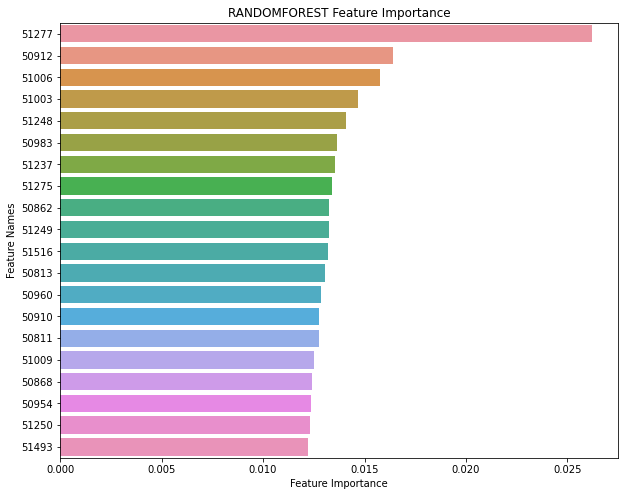

In [167]:
plot_feature_importance(forest.feature_importances_,X_test.columns,'RANDOMFOREST')

In [52]:
label = np.load("./data/3d_array_label.npy")
dfd_X['EXPIRE_FLAG']=label
dfd_X.columns = dfd_X.columns.astype(str)

In [53]:
xx=[]
yy = []
for i in range(len(dfd_X.index)):
    if i % 5 == 0:
#         print(i)
        yy.append(i)
    else : 
        xx.append(i)

In [54]:
train = dfd_X.iloc[[i-1 for i in xx],:]
train = train.sort_values(by='환자id')

test = dfd_X.iloc[[i-1 for i in yy],:]
test = test.sort_values(by='환자id')

# RandomForest

In [55]:
target = 'EXPIRE_FLAG'
X = train.drop(target, axis=1)
y = train[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

In [56]:
X.shape, y.shape, X_test.shape, y_test.shape

((6239, 690), (6239,), (1560, 690), (1560,))

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X,y)
y_pred = forest.predict(X_test)

In [58]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.6993589743589743


In [59]:
label = np.load("./data/3d_array_label.npy")
dfd_final['EXPIRE_FLAG']=label
dfd_final.columns = dfd.columns.astype(str)

xx=[]
yy = []
for i in range(len(dfd_final.index)):
    if i % 5 == 0:
#         print(i)
        yy.append(i)
    else : 
        xx.append(i)

train = dfd_final.iloc[[i-1 for i in xx],:]
train = train.sort_values(by='환자id')

test = dfd_final.iloc[[i-1 for i in yy],:]
test = test.sort_values(by='환자id')



# RandomForest

target = 'EXPIRE_FLAG'
X = train.drop(target, axis=1)
y = train[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

X.shape, y.shape, X_test.shape, y_test.shape

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X,y)
y_pred = forest.predict(X_test)

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.6923076923076923


In [60]:
dfd_X.sum().sum()

318524.0

In [61]:
dfd_final.sum().sum()

322312.0